In [28]:
#importing libraries

import numpy as np
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot as scatter

from scipy.sparse import csr_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import DictionaryLearning

from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

from frameworks import *
#from sklearn.model_selection import cross_val_score
#import sklearn.metrics.scorer as scorer


#reading data from file

#df,meta=pyreadstat.read_sav("C:/Users/APPLE/Desktop/Folders/sana thesis/SHAHNAZ-meysam-tekvando.sav")
df=pd.read_excel("C:/Users/APPLE/Desktop/sana thesis/SHAHNAZ-meysam-tekvandolabelmodified.xls")

#preprocessing operations such as converting Nan values to zero,
#converting fields without value to zero,
#removing ID,fisrtname, and familyname columns from dataset
#data=np.nan_to_num(data,0)

features_name=df.columns
data=np.array(df)
df=pd.DataFrame(data=data,columns=features_name)
df=df.drop(['firstname','familyname','year'],axis=1)

# keep only women samples
df1=df
for l in range(2559):
    if (df1.iloc[l,0]==2.0):
        df=df.drop([l])    

true_labels=df.iloc[:,-1]
df=df.drop(['label','gender'],axis=1)
features_name=df.columns
        
true_labels=true_labels.fillna(0)
for i in range(len(true_labels)):
    if (true_labels.iloc[i]==0):
        true_labels.iloc[i]=-1


In [15]:
df=df.drop(['HR','Concani','burus','ArmSpan','Vo2Max','WingtePP','wingetAP','ricaveri','oneMayl','pareshTool','joftDoTaraf','barfix','marpych','jaheshJanebi',
            'FlexibleTanehBePosht','FlexibleShoulder','FlexibleRan','RTshenidari','tawanBiHavazi','biHAVA1609','Do1600','yekMayl',
            'metr540','taadol'],axis=1)
features_name=df.columns

In [16]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

data=np.array(df)
data=data.astype('float')
data[data==0.0]=np.nan
df=pd.DataFrame(data=data,columns=features_name)

strategy=('mean','median')
simpleimputer=SimpleImputer(missing_values=np.nan, strategy=strategy[1])
data1=simpleimputer.fit_transform(df)
#df1=pd.DataFrame(data=data1,columns=features_name)
#simpleimputer=SimpleImputer(missing_values=0.0, strategy=strategy[0])
#data1=simpleimputer.fit_transform(df1)


knnimputer=KNNImputer(missing_values=np.nan)
data2=knnimputer.fit_transform(df)
#df2=pd.DataFrame(data=data2,columns=features_name)
#knnimputer=KNNImputer(missing_values=0.0)
#data2=knnimputer.fit_transform(df2)

estimators=[BayesianRidge(),
            DecisionTreeRegressor(max_features='sqrt',random_state=0),
            ExtraTreesRegressor(n_estimators=10, random_state=0),
            KNeighborsRegressor(n_neighbors=15)
           ]

iterativeimputer=IterativeImputer(missing_values=np.nan, random_state=0, estimator=estimators[1], n_nearest_features=5)
data3=iterativeimputer.fit_transform(df)
#df3=pd.DataFrame(data=data3,columns=features_name)
#iterativeimputer=IterativeImputer(missing_values=0.0, random_state=0, estimator=estimators[0], n_nearest_features=5)
#data3=iterativeimputer.fit_transform(df3)



ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.

In [17]:
#performing standardScaler as preprocessing

scaler=StandardScaler(with_mean=False)
data_scaled=scaler.fit_transform(data2)
df=pd.DataFrame(data=data_scaled,columns=features_name)


In [18]:
#keep 70% of labeled data for test
true_labels=true_labels.astype(float)
true_labels.reset_index(inplace=True, drop=True)

df['label']=true_labels
df3=df
df4=df

# making df3 as a labeled set
for l in range(len(df)):
    if(df.iloc[l,-1]==-1):
        df3=df3.drop([l])
        
df3_labels=df3.iloc[:,-1]
df5=df3
#df3=df3.drop(['label'],axis=1)
X_train_labeled,X_test=train_test_split(df3,test_size=0.60,random_state=42)

#making df4 as an unlabeled set
for l in range(len(df)):
    for i in range(len(df5)):
        if (df.iloc[l,:].equals(df5.iloc[i,:])):
            df4=df4.drop([l])
            break

X_train=df4
X_train_unlabeled=X_train
X_train=X_train.append(X_train_labeled)

Y_train_labeled=X_train_labeled.iloc[:,-1]
X_train_labeled=X_train_labeled.drop(['label'],axis=1)
Y_train_labeled=Y_train_labeled.to_frame()
Y_train_labeled=Y_train_labeled.astype(float)
Y_train_labeled=Y_train_labeled.reset_index(drop=True)
X_train_labeled=X_train_labeled.astype(float)
X_train_labeled=X_train_labeled.reset_index( drop=True)

X_train_unlabeled=X_train_unlabeled.drop(['label'],axis=1)
X_train_unlabeled=X_train_unlabeled.astype(float)
X_train_unlabeled=X_train_unlabeled.reset_index( drop=True)



Y_train=X_train.iloc[:,-1]
Y_test=X_test.iloc[:,-1]
X_train=X_train.drop(['label'],axis=1)
X_test=X_test.drop(['label'],axis=1)
Y_train=Y_train.astype(float)
Y_train=Y_train.reset_index(drop=True)
Y_test=Y_test.astype(float)
Y_test=Y_test.reset_index( drop=True)
X_train=X_train.astype(float)
X_test=X_test.astype(float)
X_train=X_train.reset_index( drop=True)
X_test=X_test.reset_index( drop=True)
Y_train=Y_train.to_frame()
Y_test=Y_test.to_frame()

In [6]:
#preprocess for class 1

Y_train=Y_train.replace(2,0)
Y_train=Y_train.replace(3,0)

true_labels=true_labels.replace(2,0)
true_labels=true_labels.replace(3,0)


Y_test=Y_test.replace(2,0)
Y_test=Y_test.replace(3,0)

Y_train_labeled=Y_train_labeled.replace(2,0)
Y_train_labeled=Y_train_labeled.replace(3,0)

In [6]:
#preprocess for class 2 

Y_train=Y_train.replace(1,0)
Y_train=Y_train.replace(3,0)
Y_train=Y_train.replace(2,1)


true_labels=true_labels.replace(1,0)
true_labels=true_labels.replace(3,0)
true_labels=true_labels.replace(2,1)


Y_test=Y_test.replace(1,0)
Y_test=Y_test.replace(3,0)
Y_test=Y_test.replace(2,1)


Y_train_labeled=Y_train_labeled.replace(1,0)
Y_train_labeled=Y_train_labeled.replace(3,0)
Y_train_labeled=Y_train_labeled.replace(2,1)

In [19]:
#preprocess for class 3 


Y_train=Y_train.replace(1,0)
Y_train=Y_train.replace(2,0)
Y_train=Y_train.replace(3,1)


true_labels=true_labels.replace(1,0)
true_labels=true_labels.replace(2,0)
true_labels=true_labels.replace(3,1)


Y_test=Y_test.replace(1,0)
Y_test=Y_test.replace(2,0)
Y_test=Y_test.replace(3,1)


Y_train_labeled=Y_train_labeled.replace(1,0)
Y_train_labeled=Y_train_labeled.replace(2,0)
Y_train_labeled=Y_train_labeled.replace(3,1)

In [23]:
#SelfLearning

from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import importlib
from sklearn.linear_model import SGDClassifier
import sys
sys.path.append('C:/Users/APPLE/Desktop/sana thesis/semi-supervised/semisup-learn-master/semisup-learn-master/frameworks')
sys.path.append('C:/Users/APPLE/Desktop/sana thesis/semi-supervised/qns3vm')
import qns3vm
import CPLELearning
import SelfLearning 
import random

ROC_semiboost = list()
ROC_clf = list()

X_train=np.array(X_train)
X_train_unlabeled=np.array(X_train_unlabeled)
Y_train=np.array(Y_train)
Y_train=np.squeeze(Y_train)

X_test=np.array(X_test)
Y_test=np.array(Y_test)
Y2_test=Y_test
Y_test=np.squeeze(Y_test)

X_train_labeled=np.array(X_train_labeled)
Y_train_labeled=np.array(Y_train_labeled)
Y_train_labeled=np.squeeze(Y_train_labeled)


#feature extraction algorithms

svd = TruncatedSVD(n_components=2, algorithm='randomized')
data_extracted=svd.fit_transform(X_train)
data_test_extracted=svd.fit_transform(X_test)
data_train_labeled_extracted=svd.fit_transform(X_train_labeled)
data_train_unlabeled_extracted=svd.fit_transform(X_train_unlabeled)

#nmf=NMF(n_components=2, init='random', random_state=0)
#data_extracted=nmf.fit_transform(X_train)
#data_test_extracted=nmf.fit_transform(X_test)
#data_train_labeled_extracted=nmf.fit_transform(X_train_labeled)

#fastICA=FastICA(n_components=2, random_state=0)
#data_extracted=fastICA.fit_transform(X_train)
#data_test_extracted=fastICA.fit_transform(X_test)
#data_train_labeled_extracted=fastICA.fit_transform(X_train_labeled)

#kpca=KernelPCA(n_components=2,kernel='poly')
#data_extracted=kpca.fit_transform(X_train)
#data_test_extracted=kpca.fit_transform(X_test)
#data_train_labeled_extracted=kpca.fit_transform(X_train_labeled)

#lda=LatentDirichletAllocation(n_components=2, random_state=0)
#data_extracted=lda.fit_transform(X_train)
#data_test_extracted=lda.fit_transform(X_test)
#data_train_labeled_extracted=lda.fit_transform(X_train_labeled)

#pca=PCA(n_components=2)
#data_extracted=pca.fit_transform(X_train)
#data_test_extracted=pca.fit_transform(X_test)
#data_train_labeled_extracted=pca.fit_transform(X_train_labeled)

#fa=FactorAnalysis(n_components=2, random_state=0)
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

#dl=DictionaryLearning(n_components=2, random_state=0, fit_algorithm='cd',transform_algorithm='lasso_cd')
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

''' SelfLearning  '''

any_scikitlearn_classifier=SVC(probability=True)
smodel=SelfLearning.SelfLearningModel(any_scikitlearn_classifier)
smodel.fit(data_extracted,Y_train)
y_predicted=smodel.predict(data_test_extracted)
cm=confusion_matrix(Y2_test, y_predicted)
print("self-learning score %f" %(smodel.score(data_test_extracted, Y2_test)))
print("classification report of self-learning")
print(classification_report(Y2_test, y_predicted, labels=np.unique(y_predicted)))
print("confusion_matrix")
print(cm)

'''CPLELearning (logistic regression)'''
basemodel = SGDClassifier(loss='log', penalty='l1') # scikit logistic regression
lcplemodel = CPLELearning.CPLELearningModel(basemodel)
lcplemodel.fit(data_extracted, Y_train)
y_predicted=lcplemodel.predict(data_test_extracted)
cm=confusion_matrix(Y2_test, y_predicted)
print("CPLE semi-supervised log.reg. score %f" %lcplemodel.score(data_test_extracted, Y2_test))

print("classification report of CPLELearning (logistic regression)")
print(classification_report(Y2_test, y_predicted, labels=np.unique(y_predicted)))
print("confusion_matrix")
print(cm)

'''CPLELearning (RBF SVM model) ''' 
svmcplemodel = CPLELearning.CPLELearningModel(SVC(kernel="rbf", probability=True), predict_from_probabilities=True) # RBF SVM
svmcplemodel.fit(data_extracted, Y_train)
y_predicted=svmcplemodel.predict(data_test_extracted)
cm=confusion_matrix(Y2_test, y_predicted)
print("CPLE semi-supervised RBF SVM score %f" %svmcplemodel.score(data_test_extracted, Y2_test))

print("classification report of CPLELearning (RBF SVM model)")
print(classification_report(Y2_test, y_predicted, labels=np.unique(y_predicted)))
print("confusion_matrix")
print(cm)

#''' QNS3VM '''
#Y_train_labeled=Y_train_labeled.astype(int)
#qns3vmmodel = qns3vm.QN_S3VM_Dense(data_train_labeled_extracted,Y_train_labeled,data_train_unlabeled_extracted,random.Random())
#qns3vmmodel.train()
#y_predicted=qns3vmmodel.predict(data_test_extracted)
#cm=confusion_matrix(Y2_test, y_predicted)
#print("Quasi Newton semi-supervised SVM score %f" %qns3vmmodel.score(data_test_extracted, Y2_test))

#print("classification report of QNS3VM (linear kernel)")
#print(classification_report(Y2_test, y_predicted, labels=np.unique(y_predicted)))
#print("confusion_matrix")
#print(cm)



self-learning score 0.409091
classification report of self-learning
              precision    recall  f1-score   support

         1.0       0.41      1.00      0.58        18

   micro avg       0.41      1.00      0.58        18
   macro avg       0.41      1.00      0.58        18
weighted avg       0.41      1.00      0.58        18

confusion_matrix
[[ 0 26]
 [ 0 18]]
slice indices must be integers or None or have an __index__ method
CPLE semi-supervised log.reg. score 0.590909
classification report of CPLELearning (logistic regression)
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74        26

   micro avg       0.59      1.00      0.74        26
   macro avg       0.59      1.00      0.74        26
weighted avg       0.59      1.00      0.74        26

confusion_matrix
[[26  0]
 [18  0]]
slice indices must be integers or None or have an __index__ method
CPLE semi-supervised RBF SVM score 0.659091
classification report of CPLELe

In [24]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(Y2_test, y_predicted)
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(Y2_test.ravel(), y_predicted.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

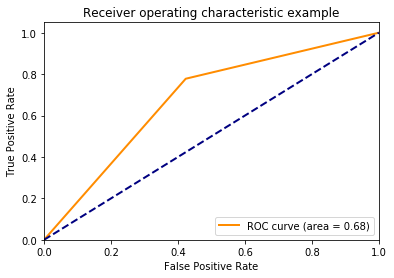

In [25]:
#Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'SVD Second Principle Component')

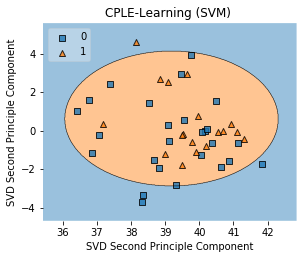

In [27]:
''' Plot Test data'''
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

y=Y2_test
y=y.astype(int)
y=np.squeeze(y)

#ax = plt.subplot(gs[0, 0])
#fig = plot_decision_regions(X=data_test_extracted, y=y, clf=smodel, legend=2)
#plt.title('Self-Learning Model')
#plt.xlabel('SVD Second Principle Component')
#plt.ylabel('SVD Second Principle Component')


''' Plot '''
#ax = plt.subplot(gs[0, 1])
#fig = plot_decision_regions(X=data_test_extracted, y=y, clf=lcplemodel, legend=2)
#plt.title('logistic-CPLE Model')
#plt.xlabel('NMF Second Principle Component')
#plt.ylabel('NMF Second Principle Component')


ax = plt.subplot(gs[1, 0])
fig = plot_decision_regions(X=data_test_extracted, y=y, clf=svmcplemodel, legend=2)

plt.title('CPLE-Learning (SVM) ')
plt.xlabel('SVD Second Principle Component')
plt.ylabel('SVD Second Principle Component')



In [60]:
# learning for whole data

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import DictionaryLearning

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial.distance import pdist,squareform
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import importlib

ROC_semiboost = list()
ROC_clf = list()


whole_data=df.drop(['label'],axis=1)
whole_data=np.array(whole_data)
true_labels=np.array(true_labels)
true_labels=np.squeeze(true_labels)


#feature extraction algorithms

svd = TruncatedSVD(n_components=2, algorithm='randomized')
whole_data_extracted=svd.fit_transform(whole_data)

#nmf=NMF(n_components=2, init='random', random_state=0)
#whole_data_extracted=nmf.fit_transform(whole_data)


#fastICA=FastICA(n_components=2, random_state=0)
#data_extracted=fastICA.fit_transform(X_train)
#data_test_extracted=fastICA.fit_transform(X_test)
#data_train_labeled_extracted=fastICA.fit_transform(X_train_labeled)

#kpca=KernelPCA(n_components=2,kernel='poly')
#data_extracted=kpca.fit_transform(X_train)
#data_test_extracted=kpca.fit_transform(X_test)
#data_train_labeled_extracted=kpca.fit_transform(X_train_labeled)

#lda=LatentDirichletAllocation(n_components=2, random_state=0)
#data_extracted=lda.fit_transform(X_train)
#data_test_extracted=lda.fit_transform(X_test)
#data_train_labeled_extracted=lda.fit_transform(X_train_labeled)

#pca=PCA(n_components=2)
#data_extracted=pca.fit_transform(X_train)
#data_test_extracted=pca.fit_transform(X_test)
#data_train_labeled_extracted=pca.fit_transform(X_train_labeled)

#fa=FactorAnalysis(n_components=2, random_state=0)
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

#dl=DictionaryLearning(n_components=2, random_state=0, fit_algorithm='cd',transform_algorithm='lasso_cd')
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

''' SelfLearning  '''

#any_scikitlearn_classifier=SVC(probability=True)
#smodel=SelfLearning.SelfLearningModel(any_scikitlearn_classifier)
smodel.fit(whole_data_extracted,true_labels)
y_predicted=smodel.predict(whole_data_extracted)

'''CPLELearning (logistic regression)'''
#basemodel = SGDClassifier(loss='log', penalty='l1') # scikit logistic regression
#lcplemodel = CPLELearning.CPLELearningModel(basemodel)
lcplemodel.fit(whole_data_extracted, true_labels)
y_predicted=lcplemodel.predict(whole_data_extracted)

'''CPLELearning (RBF SVM model) ''' 
#svmcplemodel = CPLELearning.CPLELearningModel(SVC(kernel="rbf", probability=True), predict_from_probabilities=True) # RBF SVM
svmcplemodel.fit(whole_data_extracted, true_labels)
y_predicted=svmcplemodel.predict(whole_data_extracted)

slice indices must be integers or None or have an __index__ method
slice indices must be integers or None or have an __index__ method


Text(0.5, 1.0, 'Raw_whole_data')

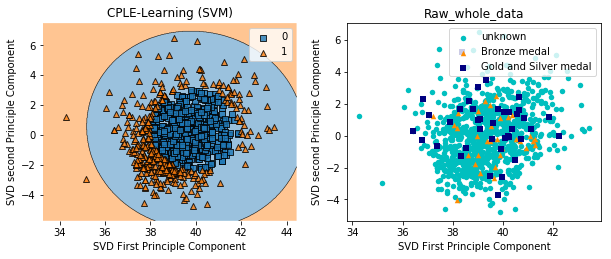

In [61]:
''' Plot whole data'''
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

y=y_predicted
y=y.astype(int)
y=np.squeeze(y)

y_true=true_labels
y_true=y_true.astype(int)
y_true=np.squeeze(y_true)

#ax = plt.subplot(gs[0, 0])
#fig = plot_decision_regions(X=whole_data_extracted, y=y, clf=smodel, legend=2)
#plt.title('Self-Learning')
#fig=plt.ylabel("NMF second Principle Component")
#plt.legend(scatterpoints=1, shadow=False, loc='upper right')
           
#ax = plt.subplot(gs[0, 1])
#fig = plot_decision_regions(X=whole_data_extracted, y=y, clf=lcplemodel, legend=2)
#plt.title('CPLE-Learning (logistic regression)')
#fig=plt.xlabel("SVD First Principle Component")
#fig=plt.ylabel("SVD second Principle Component")
#plt.legend(scatterpoints=1, shadow=False, loc='upper right')
           
ax = plt.subplot(gs[1, 0])
fig = plot_decision_regions(X=whole_data_extracted, y=y, clf=svmcplemodel, legend=2)
plt.title('CPLE-Learning (SVM)')
fig=plt.xlabel("SVD First Principle Component")
fig=plt.ylabel("SVD second Principle Component")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')

ax = plt.subplot(gs[1, 1])
fig=plt.scatter(whole_data_extracted[true_labels==-1, 0],whole_data_extracted[true_labels==-1, 1],color='c',marker='o', lw=0, label="unknown", s=30)
fig=plt.scatter(whole_data_extracted[true_labels==1, 0],whole_data_extracted[true_labels==1, 1],color='darkorange',marker='^', lw=0, label="Bronze medal", s=30)
fig=plt.scatter(whole_data_extracted[true_labels==0, 0],whole_data_extracted[true_labels==0, 1],color='navy',marker='s', lw=0, label="Gold and Silver medal", s=30)
fig=plt.xlabel("SVD First Principle Component")
fig=plt.ylabel("SVD second Principle Component")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title('Raw_whole_data')

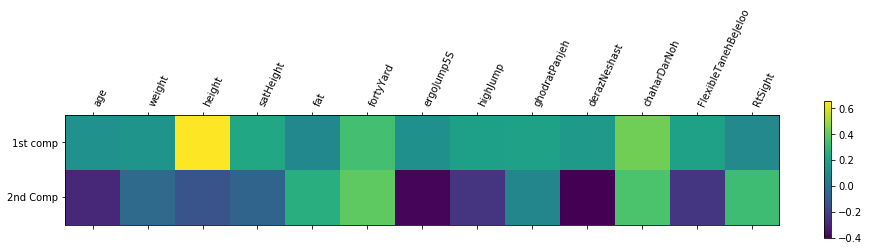

In [22]:
plt.matshow(svd.components_,cmap='viridis')
#plt.matshow(lda.components_,cmap='viridis')
#plt.matshow(nmf.components_,cmap='viridis')
#plt.matshow(kpca.lambdas_,cmap='viridis')


plt.yticks([0,1],['1st comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features_name)),features_name,rotation=65,ha='left')
#plt.tight_layout()
plt.show()